# 专治各种python字符编码问题疑难杂症

## 标准动作

* 在脚本第一行指定编码格式：

In [7]:
# coding:utf-8

* 将默认的ascii字符流处理方式变为utf-8：

In [4]:
import sys
sys.getdefaultencoding()

'ascii'

In [5]:
reload(sys)
sys.setdefaultencoding('utf-8')

## 常见字符编码知识

### ascii编码

是最早使用、最常见的一种字符编码，包含了128个字符（英文字母、数字、符号、控制字符等），也是下面讲到的所有编码的公共集合。

### ISO8859-1编码

西欧字符集编码。

### gb2312/gbk/gb18030之间的关系

这是简体中文的三种编码，从左到右包含的字符范围依次增大，左边是右边的子集。

### big5编码

繁体中文编码。

### unicode/utf-8/utf-16/utf-32之间的关系

* unicode是一个字符集，表示包含了哪些字符——包含了世界上所有字符。

* 而utf-8/utf-16/utf-32是字符编码，表示用哪种方式表示unicode字符集，是对unicode字符集的具体编码实现方式。

* 最常用的是utf-8

## 获取字符串的编码格式

In [1]:
from chardet import detect

In [9]:
detect('abc')

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [11]:
detect(r'abc')

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

注：detect的参数不能是unicode字符串，否则会报错。

## str和unicode对象

str和unicode都是python内置的两种字符串类，并且有着同样的父类：basestring

In [14]:
type('123')

str

In [15]:
type(u'123')

unicode

In [21]:
str.__bases__

(basestring,)

In [20]:
unicode.__bases__

(basestring,)

In [19]:
basestring.__bases__

(object,)

## 用好unicode这个桥梁

有时候并不知道一个字符串的编码是什么（比如从某个文件中读取的内容），这时候如何把这个文件的字符编码转为需要的编码呢（比如utf-8）？

答案是：借助unicode为桥梁。

比如：

In [ ]:
with open('content.txt','r') as fin:
    content = fin.read()
    # 这里先把文件内容decode成utf-8编码（中间桥梁），再encode成gbk编码（目标编码）
    target = content.decode('utf-8').encode('gbk')

## 把转义的中文unicode字符串转为中文

In [5]:
s = '\u6211'

In [3]:
type(s)

str

In [6]:
print s

\u6211


In [4]:
print s.decode('unicode-escape').encode('utf-8')

我


## 把各种字符都统一成unicode来处理

In [25]:
from __future__ import unicode_literals

In [26]:
type('123')

unicode

In [27]:
type(u'123')

unicode

## 解决matplotlib图表中的中文乱码问题

按照matplotlib默认的字符编码，在图表中中文不能正常显示，会显示为方框，如下：

In [1]:
import matplotlib.pyplot as plt

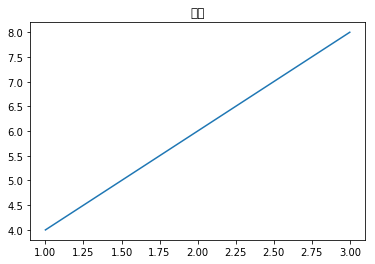

In [2]:
x = [1,2,3]
y = [4,6,8]
plt.plot(x,y)
plt.title(u'数据')
plt.show()

解决方法：

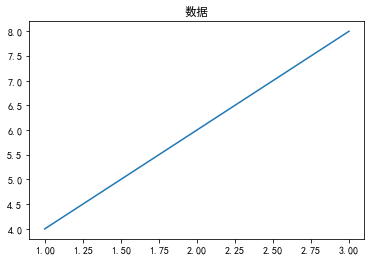

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方框的问题
plt.title(u'数据')
plt.plot(x,y)
plt.show()